## 1. Explain the concepts of batch normalization in context of Artificial Neural Networks.
---

### Batch normalization is a technique used in artificial neural networks (ANNs) to improve the training and performance of deep learning models. It addresses the problem of internal covariate shift, which refers to the change in the distribution of network activations as the parameters of the preceding layers change during training. By normalizing the inputs within each mini-batch, batch normalization helps in stabilizing the learning process and accelerating convergence.

### Here are the key concepts of batch normalization:

1. `Normalization`: In the context of batch normalization, normalization refers to the process of standardizing the inputs of each layer to have zero mean and unit variance. It helps in reducing the internal covariate shift, which can hinder the training process.

2. `Mini-batch Statistics`: Batch normalization operates on mini-batches of data during training. For each mini-batch, the mean and variance of the input values are calculated. These statistics are used to normalize the inputs within that mini-batch.

3. `Scaling and Shifting`: After normalization, the input values are scaled and shifted using learnable parameters. This allows the network to learn the optimal scale and shift for each normalized input. The scaling and shifting parameters are learned during the training process.

4. `Integration into the Network Architecture`: Batch normalization can be inserted into the network architecture between the linear transformation (e.g., fully connected layer) and the activation function (e.g., ReLU). By normalizing the inputs before applying the activation function, batch normalization ensures that the inputs are centered around the non-linear regime of the activation function, which can improve the model's representational capacity.

5. `Training and Inference Phases`: During training, batch normalization computes the mini-batch statistics and uses them for normalization. However, during the inference phase, when making predictions on individual samples, the mini-batch statistics may not be available. In such cases, running averages of the mean and variance computed during training are used for normalization.

### Overall, batch normalization is a powerful technique in the training of deep neural networks. It addresses the challenges of internal covariate shift and helps in improving the stability, convergence speed, and generalization performance of the models.

## 2. Describe benifits of using batch normalization during training
---

### Batch normalization offers several benefits when used during training in deep learning models. Here are some of the key advantages:

1. `Improved Training Stability`: By reducing the internal covariate shift, batch normalization helps in stabilizing the training process. It ensures that the network's parameters are updated consistently across layers during backpropagation, leading to more stable and reliable training.

2. `Accelerated Convergence`: Batch normalization allows for higher learning rates without the risk of divergence. By normalizing the inputs within each mini-batch, it reduces the scale of the gradients and ensures that the optimization process progresses more smoothly. This, in turn, leads to faster convergence and reduced training time.

3. `Reduced Dependency on Initialization`: Deep neural networks are highly sensitive to the choice of initial weights. However, with batch normalization, the model becomes less dependent on the initial weight initialization. It allows the network to converge and learn effectively even with suboptimal initial weights, making it more robust to initialization choices.

4. `Regularization Effect`: Batch normalization acts as a form of regularization. By adding noise to the network activations through the mini-batch statistics, it helps in reducing overfitting. This regularization effect can improve the model's generalization performance and make it less prone to memorizing the training data.

5. `Handling of Vanishing/Exploding Gradients`: Deep networks often suffer from the problem of vanishing or exploding gradients, which can hinder the learning process. Batch normalization mitigates these issues by normalizing the inputs and keeping them within a reasonable range. It ensures that the gradients propagated through the network are neither too small nor too large, thus facilitating more stable and effective training.

6. `Enhanced Network Capacity`: Batch normalization enables the network to learn higher-level representations and have a larger capacity to model complex patterns. By normalizing the inputs before applying the activation function, batch normalization ensures that the inputs are centered around the non-linear regime of the activation function. This allows the network to explore a wider range of non-linear transformations and capture more intricate relationships in the data.

### Overall, the benefits of using batch normalization during training include improved training stability, accelerated convergence, reduced sensitivity to weight initialization, regularization effects, handling of gradient issues, and enhanced network capacity. These advantages make batch normalization a widely adopted technique for training deep learning models effectively.

## 3. Discuss the working principle of batch normalization including the normalization steps and learnable parameters
--- 

### The working principle of batch normalization involves normalizing the inputs within each mini-batch during training in order to improve the stability and performance of deep learning models. It consists of several steps and involves the use of learnable parameters. Let's discuss the working principle in detail:

1. `Mini-Batch Statistics Calculation``:
In batch normalization, the first step is to calculate the mean and variance of the input values within each mini-batch. This is done by computing the following statistics for the mini-batch:
- Mean (`μ_batch`): It represents the average value of the input values within the mini-batch.
- Variance (`σ_batch^2`): It measures the spread or variability of the input values within the mini-batch.
These statistics are calculated separately for each feature or channel in the input data.

2. Normalization:
After calculating the mini-batch statistics, the next step is to normalize the input values within the mini-batch. The normalization step is performed using the following equation: 

$$ x_{hat_i} = (x_i - μ_{batch}) / sqrt(σ_{batch}^2 + ε) $$


In the above equation, `x_hat_i` represents the normalized value of the i-th input sample. It is obtained by subtracting the mean (`μ_batch`) from the input value (`x_i`) and dividing it by the square root of the variance (`σ_batch^2`) plus a small constant `ε` (added for numerical stability). This normalization step ensures that the inputs have zero mean and unit variance within each mini-batch.

3. Scaling and Shifting:
After normalization, the inputs are scaled and shifted using learnable parameters. This step allows the network to learn the optimal scale and shift for each normalized input. The scaling and shifting are performed using the following equation:

$$ y_i = γ * x_{hat_i} + β $$


In the equation, `y_i` represents the output value after scaling and shifting, `γ` is a learnable parameter called the "scale" parameter, and `β` is another learnable parameter called the "shift" or "bias" parameter. These parameters are updated during the training process using backpropagation and gradient descent optimization.

### By learning the optimal scale and shift for each feature, the network can adapt the normalized inputs to the requirements of the subsequent layers, allowing for more effective training and improved representation power.

### During the inference phase (i.e., making predictions on individual samples), the mini-batch statistics may not be available. In such cases, running averages of the mean and variance computed during training are used for normalization.

### The normalization and scaling-shifting steps of batch normalization ensure that the inputs to each layer in the network are more consistently distributed, reducing the effects of internal covariate shift and improving the stability and convergence of the training process.

### Overall, batch normalization works by normalizing the inputs within mini-batches, applying learnable scaling and shifting parameters, and thereby enhancing the training stability and performance of deep learning models.


## 1. Choose a dataset of your choice (eg. MNIST, CIFAR 10) and preprocess it 
---

### Load cifar10 data

In [1]:
from keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

### View the top 10 labels in train data

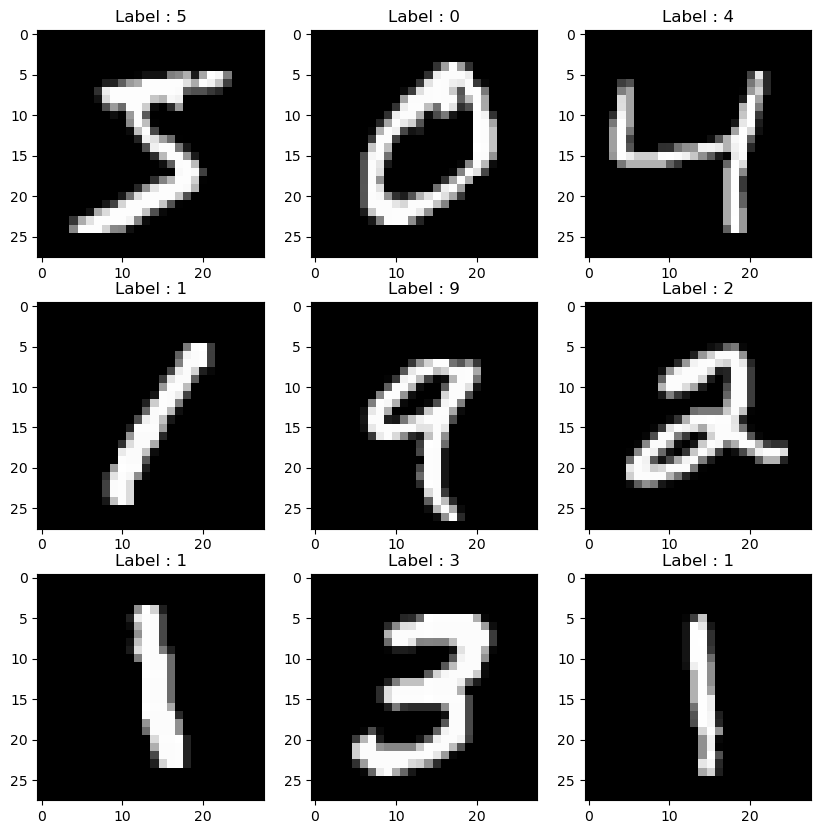

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i],cmap='gray')
    plt.title(f'Label : {y_train[i]}')
plt.show()

### Scaling the x features 

In [4]:
x_train = x_train/255
x_test = x_test/255

### Converting Y features to categorical

In [5]:
from keras.utils import to_categorical
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [6]:
y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [7]:
y_test[0:5]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

## 2. Implement a simple feedforward neural network using any deep learning framework 
---

### Implementing a simple neural network with help of keras

In [8]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

In [9]:
# Define the model
model = Sequential()

# Adding a simple flatten layer
model.add(Flatten(input_shape=(28,28,1)))

# Adding Dense Layers
model.add(Dense(64, activation='relu'))
model.add(Dense(32,activation='relu'))

# Output layer
model.add(Dense(10,activation='softmax'))

In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [11]:
# Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 52650 (205.66 KB)
Trainable params: 52650 (205.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 3. Train a neural network without using batch normalization during training
---

In [12]:
hist1 = model.fit(x_train,y_train,validation_split=0.2,epochs=30)

Epoch 1/30


1500/1500 [==============================] - 7s 4ms/step - loss: 0.3288 - accuracy: 0.9041 - val_loss: 0.1692 - val_accuracy: 0.9509
Epoch 2/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1470 - accuracy: 0.9561 - val_loss: 0.1283 - val_accuracy: 0.9628
Epoch 3/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1062 - accuracy: 0.9676 - val_loss: 0.1200 - val_accuracy: 0.9637
Epoch 4/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0817 - accuracy: 0.9747 - val_loss: 0.0945 - val_accuracy: 0.9711
Epoch 5/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0661 - accuracy: 0.9792 - val_loss: 0.0998 - val_accuracy: 0.9704
Epoch 6/30
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0535 - accuracy: 0.9836 - val_loss: 0.1032 - val_accuracy: 0.9703
Epoch 7/30
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0455 - accuracy: 0.9849 - val_loss: 0.1142 - val_accurac

In [13]:
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 3s 2ms/step - loss: 0.0361 - accuracy: 0.9935


[0.036054275929927826, 0.993483304977417]

In [14]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.1547 - accuracy: 0.9754


[0.1547301709651947, 0.9753999710083008]

## 4. Implement batch normalization layers in neural network and train the model again
---

### Build the model with batch normalization

In [15]:
from keras.layers import BatchNormalization

In [16]:
model2 = Sequential()

# Flatten Layer
model2.add(Flatten(input_shape=(28,28,1)))

# Dense layers with batch normalization
model2.add(Dense(64,activation='relu'))
model2.add(BatchNormalization())
model2.add(Dense(32,activation='relu'))
model2.add(BatchNormalization())

# Output layer
model2.add(Dense(10,activation='softmax'))

### Compile the model

In [17]:
model2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

### Model2 summary

In [18]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 64)                50240     
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_5 (Dense)             (None, 10)               

### Train the model

In [19]:
hist2 = model2.fit(x_train,y_train,validation_split=0.2,epochs=30)

Epoch 1/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3417 - accuracy: 0.9002 - val_loss: 0.1607 - val_accuracy: 0.9538
Epoch 2/30
1500/1500 [==============================] - 8s 5ms/step - loss: 0.1632 - accuracy: 0.9503 - val_loss: 0.1257 - val_accuracy: 0.9627
Epoch 3/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1245 - accuracy: 0.9614 - val_loss: 0.1161 - val_accuracy: 0.9634
Epoch 4/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.1030 - accuracy: 0.9679 - val_loss: 0.1015 - val_accuracy: 0.9704
Epoch 5/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0900 - accuracy: 0.9712 - val_loss: 0.1008 - val_accuracy: 0.9714
Epoch 6/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0777 - accuracy: 0.9747 - val_loss: 0.0929 - val_accuracy: 0.9724
Epoch 7/30
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0708 - accuracy: 0.9765 - val_loss: 0.0966 - val_accuracy:

### Evaluate results in training and testing

In [20]:
model2.evaluate(x_train,y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0263 - accuracy: 0.9937


[0.026348400861024857, 0.9937333464622498]

In [21]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0879 - accuracy: 0.9779


[0.0878644660115242, 0.9779000282287598]

## 5. Compare training and validation performance in between models with and without batch normalization
---

### Plotting the learning curve for model without batch normalization

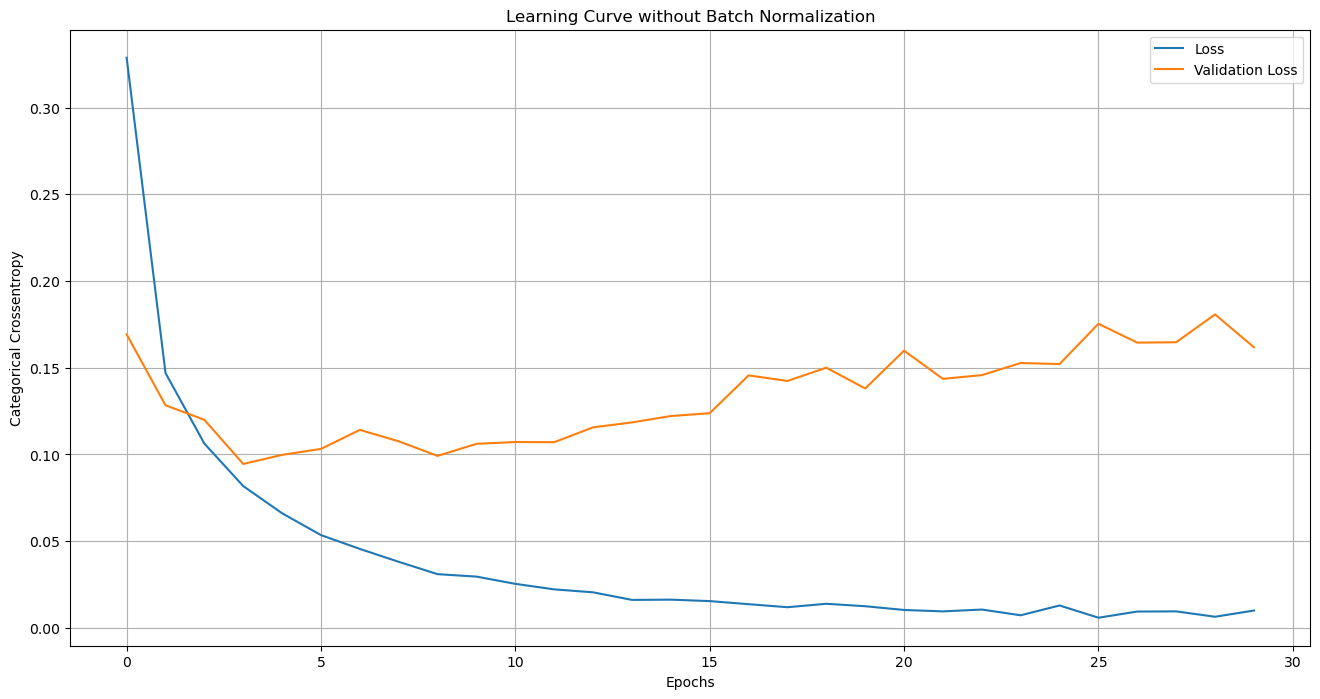

In [22]:
plt.figure(figsize=(16,8))
plt.plot(hist1.history['loss'],label='Loss')
plt.plot(hist1.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve without Batch Normalization')
plt.legend()
plt.grid()
plt.show()

### Plotting the learning curve for Batch normalized model

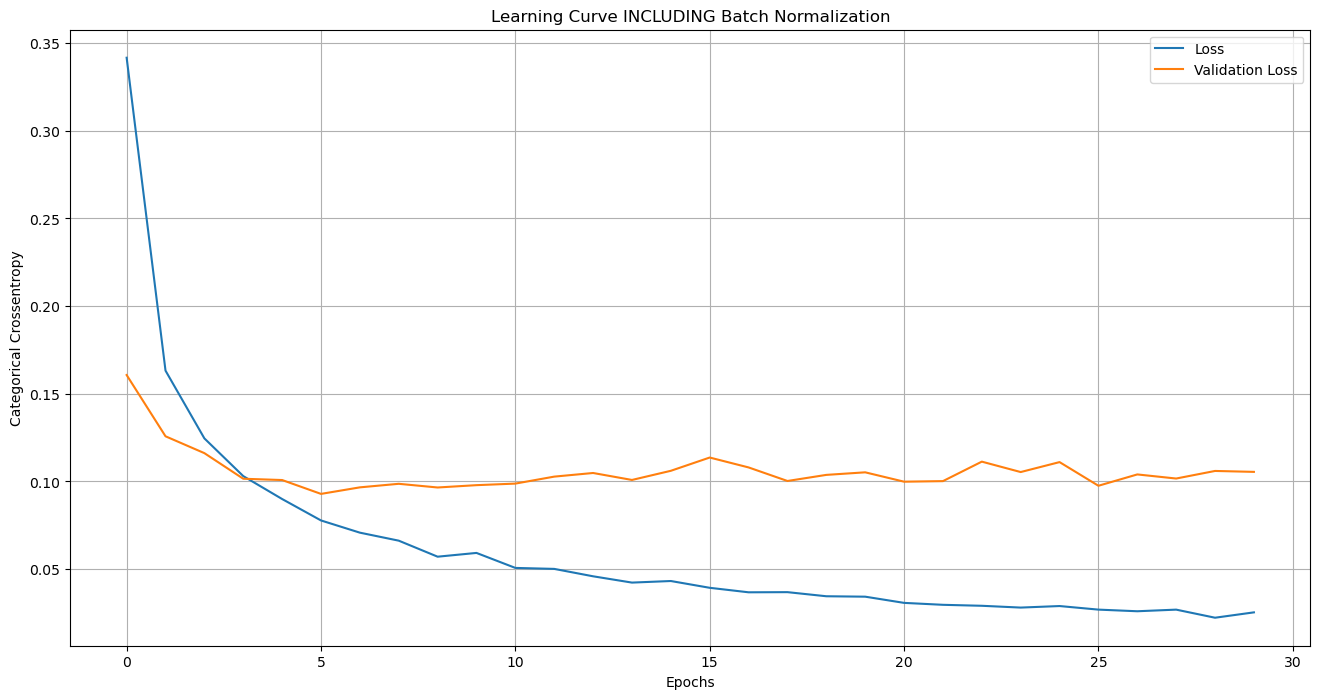

In [23]:
plt.figure(figsize=(16,8))
plt.plot(hist2.history['loss'],label='Loss')
plt.plot(hist2.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Categorical Crossentropy')
plt.title('Learning Curve INCLUDING Batch Normalization')
plt.legend()
plt.grid()
plt.show()

### Evaluation in train and test for model without Batch Normalization

In [24]:
model.evaluate(x_train,y_train)

1875/1875 [==============================] - 5s 2ms/step - loss: 0.0361 - accuracy: 0.9935


[0.036054275929927826, 0.993483304977417]

In [25]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1547 - accuracy: 0.9754


[0.1547301709651947, 0.9753999710083008]

### Evaluation of Data for model with Batch Normalization

In [26]:
model2.evaluate(x_train,y_train)

1875/1875 [==============================] - 5s 3ms/step - loss: 0.0263 - accuracy: 0.9937


[0.026348400861024857, 0.9937333464622498]

In [27]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0879 - accuracy: 0.9779


[0.0878644660115242, 0.9779000282287598]

## 6. Discuss the impact of batch normalization on training process and performance of neural network
---

### Below points were observed in above :

1. `Reduced Overfitting` : By Observing the Learning Curve it is clear that Batch Normalization reduces the overfitting of data
2. `Imporved Accuracy` : Accuracy of Batch Normalization is better than model without batch normalization
3. `Increased Training Time`: Time required to train neural network with Batch Normalization increases 

### Plotting the confusion matrix for test data predicted with Batch normalization

In [28]:
yprob_test = model2.predict(x_test)
yprob_test[0:3]

313/313 [==============================] - 1s 2ms/step


array([[5.5679315e-12, 4.7527987e-10, 2.6351358e-08, 8.4143874e-09,
        3.7771172e-10, 1.1134195e-10, 6.1903027e-13, 1.0000000e+00,
        5.6730072e-12, 8.5171958e-09],
       [2.2989232e-06, 5.1197144e-09, 9.9999499e-01, 2.6700524e-08,
        5.6054589e-10, 8.0910978e-10, 4.5662273e-07, 6.3066929e-10,
        2.1748297e-06, 8.9874384e-12],
       [9.8246140e-09, 9.9999654e-01, 6.5689329e-11, 2.1045827e-09,
        7.4046147e-09, 3.7975892e-07, 6.4037032e-08, 2.7026513e-06,
        1.0287846e-07, 1.4812422e-07]], dtype=float32)

In [29]:
import numpy as np
ypred_test = np.argmax(yprob_test,axis=1)
ypred_test[0:3]

array([7, 2, 1], dtype=int64)

In [30]:
y_test_label = np.argmax(y_test,axis=1)
y_test_label[0:3]

array([7, 2, 1], dtype=int64)

In [31]:
lb = np.unique(y_test_label)
lb

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

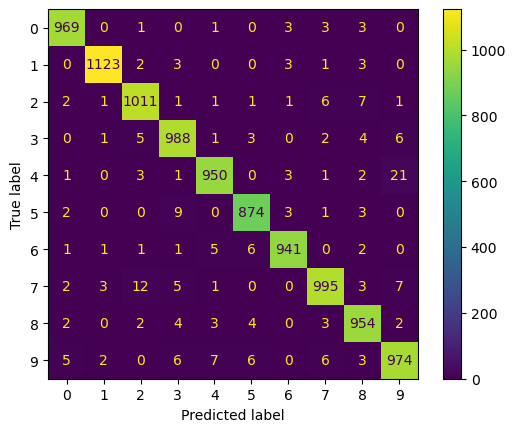

In [32]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cf = confusion_matrix(y_test_label,ypred_test)
cfd = ConfusionMatrixDisplay(cf,display_labels=lb)
cfd.plot()
plt.show()

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test_label,ypred_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.97      0.97       982
           5       0.98      0.98      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.97      0.97      1028
           8       0.97      0.98      0.97       974
           9       0.96      0.97      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## 1. Experiment with different batch sizes and observe the effect of training dynamics and model performance 
---

In [34]:
def plot_learning_curve(hist, batch_size):
    plt.figure(figsize=(16,8))
    plt.plot(hist.history['loss'],label='Loss')
    plt.plot(hist.history['val_loss'],label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Categorical Crossentropy')
    plt.title(f'Learning curve with Batch Size = {batch_size}')
    plt.legend()
    plt.grid()
    plt.show()

Training for batch size = 8
Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


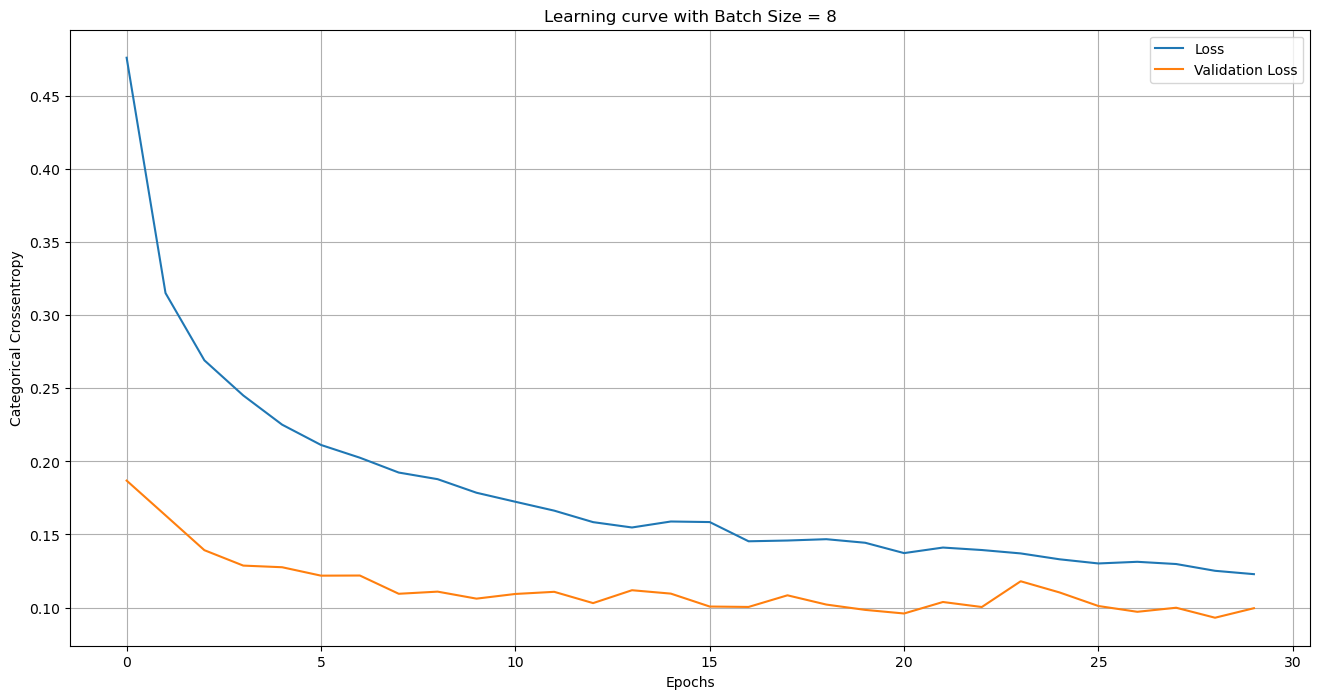

313/313 [==============================] - 1s 3ms/step - loss: 0.0914 - accuracy: 0.9741


Training for batch size = 16
Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


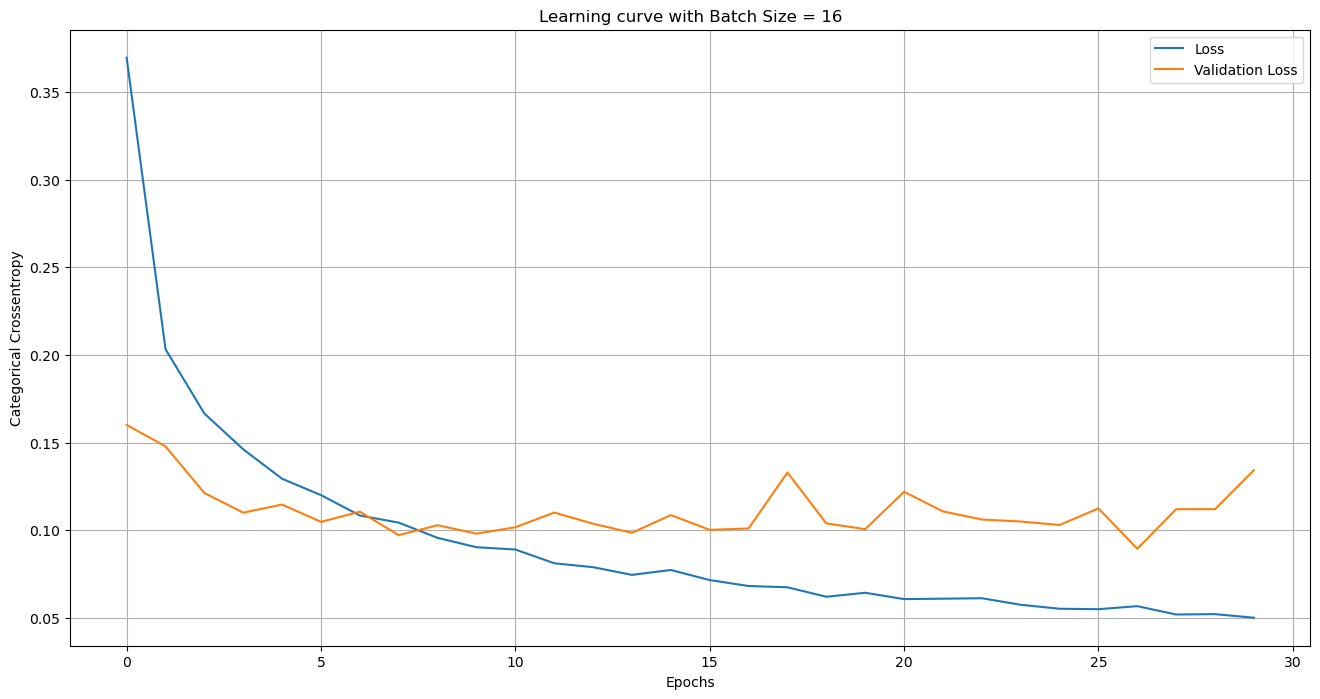

313/313 [==============================] - 1s 3ms/step - loss: 0.1110 - accuracy: 0.9750


Training for batch size = 32
Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


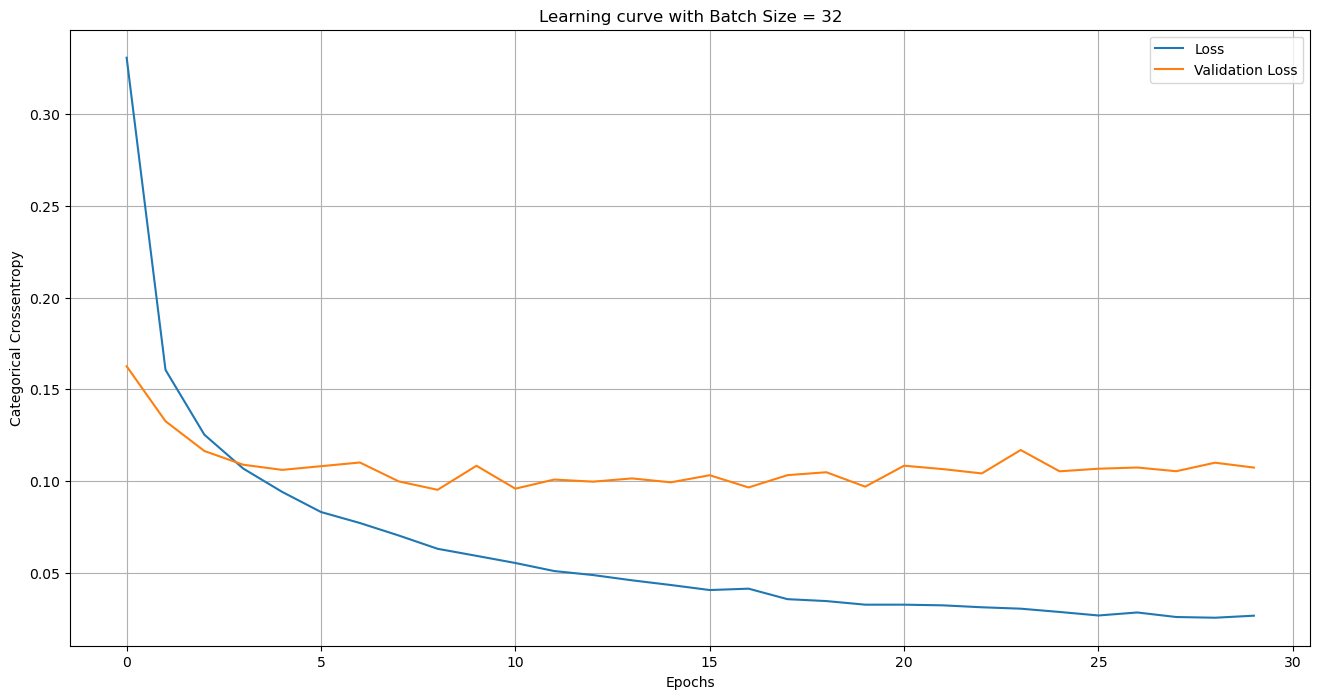

313/313 [==============================] - 1s 2ms/step - loss: 0.0948 - accuracy: 0.9777


Training for batch size = 64
Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


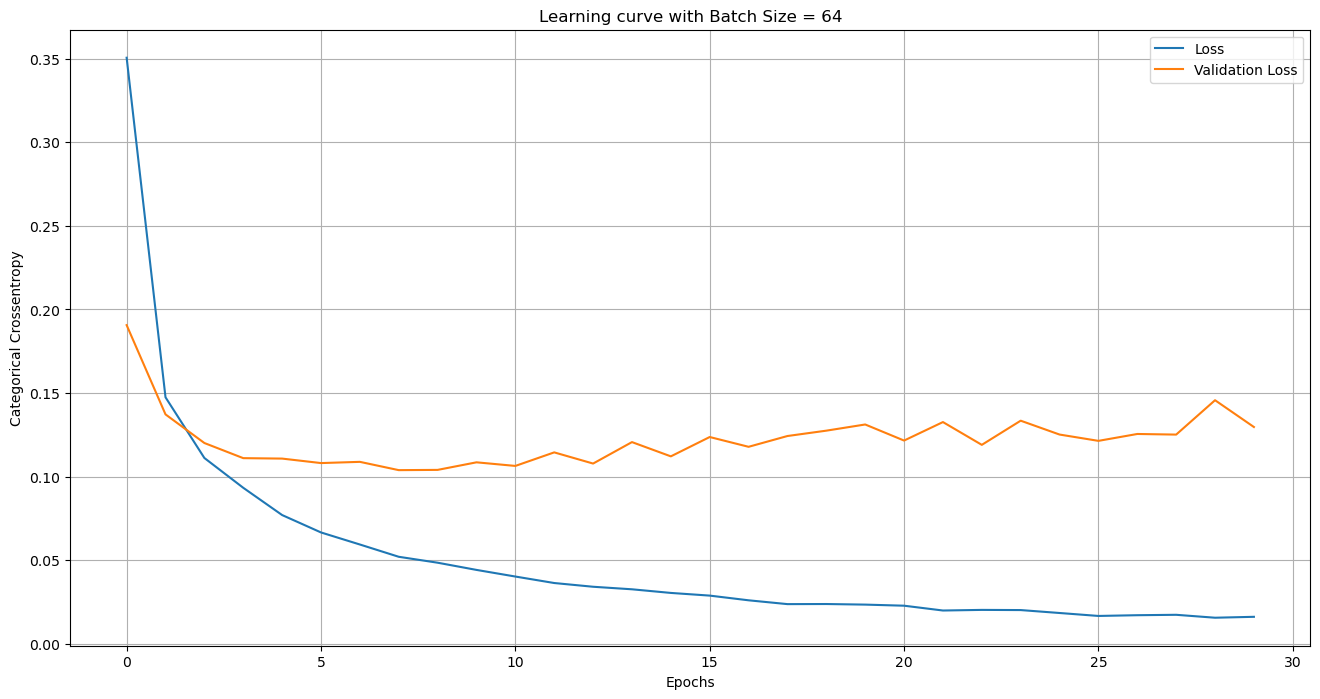

313/313 [==============================] - 1s 3ms/step - loss: 0.1177 - accuracy: 0.9731


Training for batch size = 128
Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


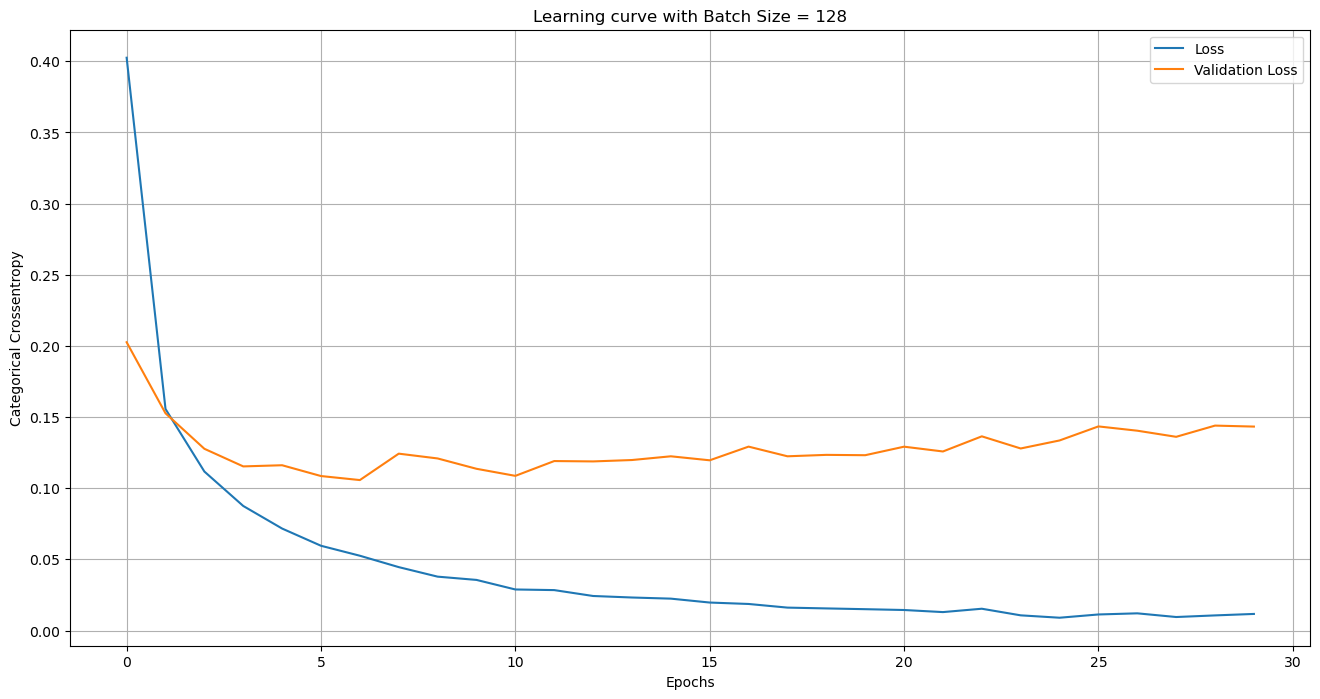

313/313 [==============================] - 1s 3ms/step - loss: 0.1325 - accuracy: 0.9716


Training for batch size = 256
Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


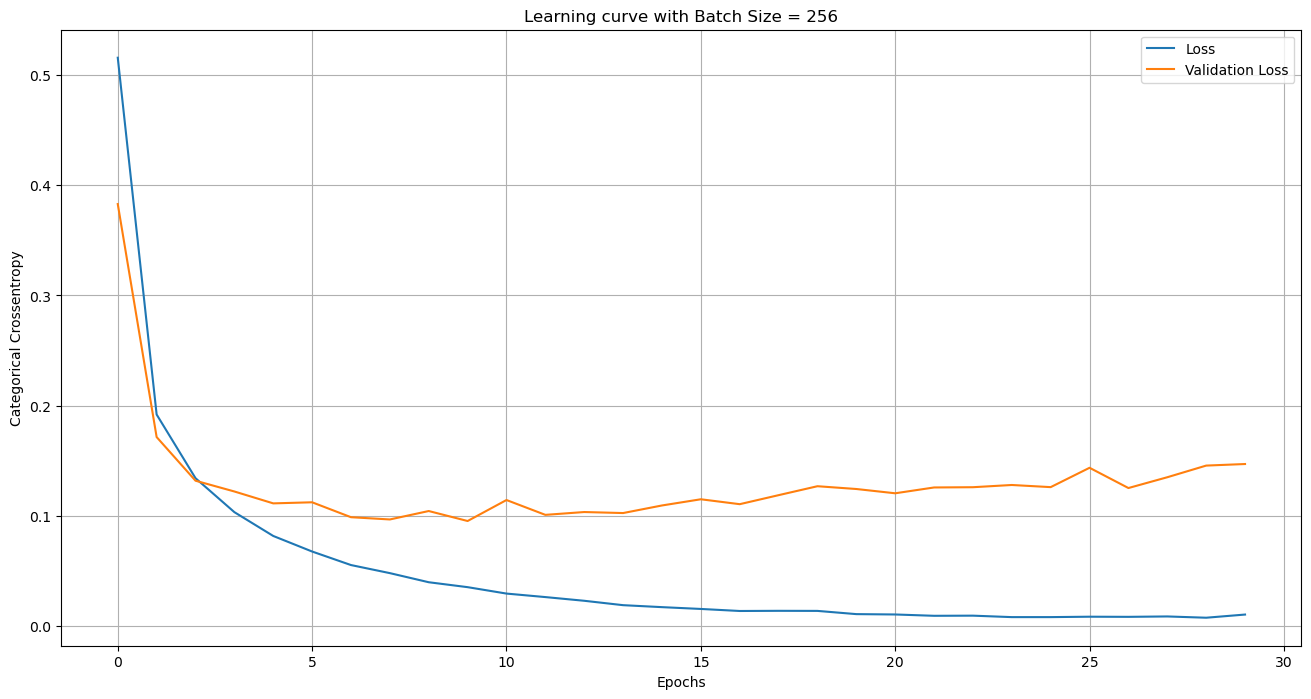

313/313 [==============================] - 1s 2ms/step - loss: 0.1416 - accuracy: 0.9665


Training for batch size = 512
Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


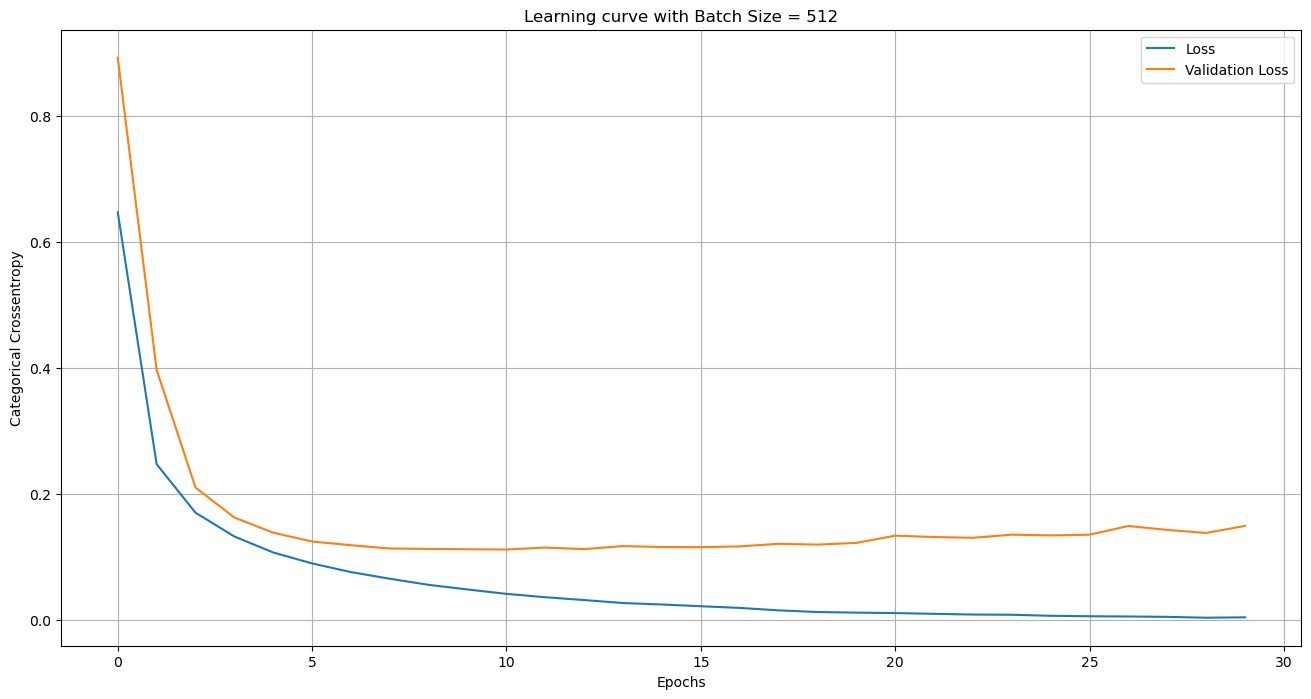

313/313 [==============================] - 1s 3ms/step - loss: 0.1357 - accuracy: 0.9676


Training for batch size = 1024
Epoch 1/30
Epoch 2/30
Epoch 3/30
Epoch 4/30
Epoch 5/30
Epoch 6/30
Epoch 7/30
Epoch 8/30
Epoch 9/30
Epoch 10/30
Epoch 11/30
Epoch 12/30
Epoch 13/30
Epoch 14/30
Epoch 15/30
Epoch 16/30
Epoch 17/30
Epoch 18/30
Epoch 19/30
Epoch 20/30
Epoch 21/30
Epoch 22/30
Epoch 23/30
Epoch 24/30
Epoch 25/30
Epoch 26/30
Epoch 27/30
Epoch 28/30
Epoch 29/30
Epoch 30/30


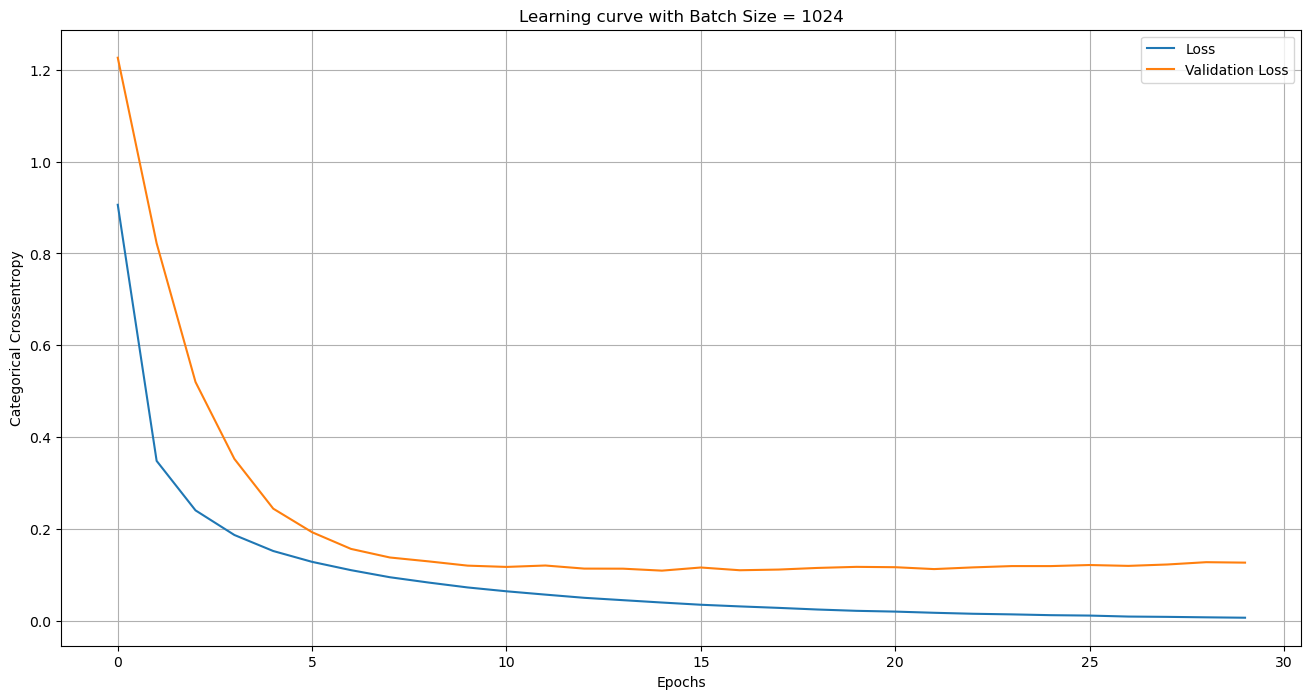

313/313 [==============================] - 1s 3ms/step - loss: 0.1126 - accuracy: 0.9687




In [35]:
sizes = [8,16,32,64,128,256,512,1024]
for i in sizes:
    print(f'Training for batch size = {i}')
    # Build Model
    nn = Sequential()
    nn.add(Flatten(input_shape=(28,28,1)))
    nn.add(Dense(64,activation='relu'))
    nn.add(BatchNormalization())
    nn.add(Dense(32,activation='relu'))
    nn.add(BatchNormalization())
    nn.add(Dense(10,activation='softmax'))
    # Compile model
    nn.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
    # Fit the model
    histn = nn.fit(x_train,y_train,validation_split=0.2,batch_size=i,epochs=30,verbose=3)
    # Plot learning curve
    plot_learning_curve(histn,i)
    nn.evaluate(x_train,y_train)
    nn.evaluate(x_test,y_test)
    print('\n=======================================================================================\n') 

### Conclusion : Batch size 16 found as most optimum for this model as test acuracy was highest of 97.68%
---
---

## 2. Discuss the advantage and potential limitations of batch Normalization in improving training of Neural Networks
---

### Batch normalization offers several advantages in improving the training of neural networks, but it also has certain potential limitations. Let's discuss both the advantages and limitations:

### Advantages of Batch Normalization:

1. `Improved Training Stability`: Batch normalization reduces the internal covariate shift by normalizing the inputs within each mini-batch. This stabilizes the training process, allowing for higher learning rates and faster convergence. It helps prevent vanishing or exploding gradients, which can hinder training stability.

2. `Accelerated Convergence`: With batch normalization, the network can converge more quickly compared to models without it. The normalized inputs provide a more consistent distribution of values, making it easier for the model to find an optimal solution in a shorter amount of time.

3. `Regularization Effect`: Batch normalization acts as a form of regularization by adding noise to the network activations. It reduces overfitting, as it adds some randomness to the network during training, leading to better generalization performance.

4. `Reduced Dependency on Initialization`: Batch normalization makes the network less sensitive to the choice of initial weights. It reduces the reliance on careful weight initialization techniques and allows the model to converge effectively even with suboptimal initial weights.

5. `Handling Different Data Scales`: Batch normalization helps normalize the inputs, making the network more robust to variations in data scales. It ensures that the network can learn effectively irrespective of the range or distribution of the input data.

### Limitations of Batch Normalization:

1. `Dependency on Mini-Batch Size`: The effectiveness of batch normalization can be influenced by the mini-batch size. Extremely small mini-batches may result in noisy estimates of the mean and variance, leading to suboptimal normalization. However, larger mini-batch sizes can also introduce computational overhead.

2. `Impact on Training Time and Memory`: Batch normalization requires additional computations during training, which can increase the overall training time. Additionally, it requires storing and updating the mean and variance values for each layer, leading to higher memory requirements.

3. `Inference Dependency on Statistics`: During inference (prediction), the statistics used for normalization are typically based on the training data. This can lead to discrepancies if the statistical properties of the training and inference data significantly differ. Techniques like running averages or batch renormalization can be used to address this limitation.

4. `Non-Robustness to Extreme Values`: Batch normalization assumes a Gaussian distribution of the input data. In the presence of extreme values or outliers, it may not perform optimally. Techniques like layer normalization or group normalization may be more suitable in such cases.

### Overall, batch normalization has proven to be a valuable technique in training neural networks. Its advantages, such as improved training stability, faster convergence, and regularization effects, make it a popular choice. However, it's important to be aware of the potential limitations and consider alternative normalization techniques depending on the specific characteristics of the data and the network architecture.